In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['lines.markersize'] = 10

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (5,5)

In [2]:
data_folder = "../00_InputData"
output_folder = "../05_Output"
file_name = "3old+4old_IgGpos"

In [3]:
names = pd.read_csv(data_folder + "/names.txt",sep=" ",header=None)
N1 = names[0][0]
N2 = names[1][0]

In [4]:
df = pd.read_csv(data_folder+"/"+ file_name + "_MSraw_BeforeNorm.tsv",sep='\t')
df

,Entry,Gene_Name,Intensity 3old-0-R1,Intensity 3old-0-R2,Intensity 3old-0-R3,Intensity 3old-5-R1,Intensity 3old-5-R2,Intensity 3old-5-R3,Intensity 3old-20-R1,Intensity 3old-20-R2,Intensity 3old-20-R3,Intensity 4old-0-R1,Intensity 4old-0-R2,Intensity 4old-0-R3,Intensity 4old-5-R1,Intensity 4old-5-R2,Intensity 4old-5-R3,Intensity 4old-20-R1,Intensity 4old-20-R2,Intensity 4old-20-R3
0,optoSrc,NaN,49442000,21401000,25857000,142920000,85226000,124760000,276860000,171710000,219670000,24303000,15727000,39179000,94276000,62998000,108420000,178390000,112600000,122870000
1,J9NTR3,OSBPL8,8284000,1447200,747900,4021000,1779500,425140,3895400,1626900,3149100,2316600,1030200,4672500,3252000,979740,4116800,3089700,1681100,720040
2,J9PAE7,TJP1,413300000,130700000,189910000,289520000,133520000,187730000,290190000,166620000,251380000,249470000,188170000,330640000,278410000,216310000,289600000,317690000,243820000,205600000
3,O97758,TJP1,9710400,4198900,7657000,8653200,4105200,6677400,10119000,5050900,9636600,6901200,5545800,13784000,8140400,6978200,6186100,9881600,7155700,6558100
4,F1PEE3,TJP2,245260000,73352000,130580000,162580000,79747000,138460000,197580000,94374000,134440000,179540000,108070000,223330000,167290000,133550000,171950000,195480000,127470000,108950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,E2RHG3,GEMIN7,731810,0,116190,556730,259970,74074,799780,258760,0,354740,224100,0,584610,0,1088900,752550,295530,395550
524,F1PLA1,LTBP1,0,246070,0,241340,192820,0,0,73418,766220,0,0,0,0,0,785720,356570,380740,786050
525,E2R0A6,RPL28,0,0,0,0,243070,0,0,0,0,0,0,0,0,0,0,689910,337100,565380
526,F1Q448,SCAF4,0,231280,0,0,185880,0,0,196210,297820,310900,0,0,0,0,948110,483040,363040,453890


In [5]:
for c in df.columns[2:]:
    mask = (df[c] == 0)
    df.loc[mask,c] = np.nan

In [6]:
df[df.columns[2:]] = np.log2(df[df.columns[2:]])
df.to_csv(output_folder+"/02_IntermediaryFiles/"+file_name + "_BeforeNorm_Log.tsv", sep='\t', index = False)

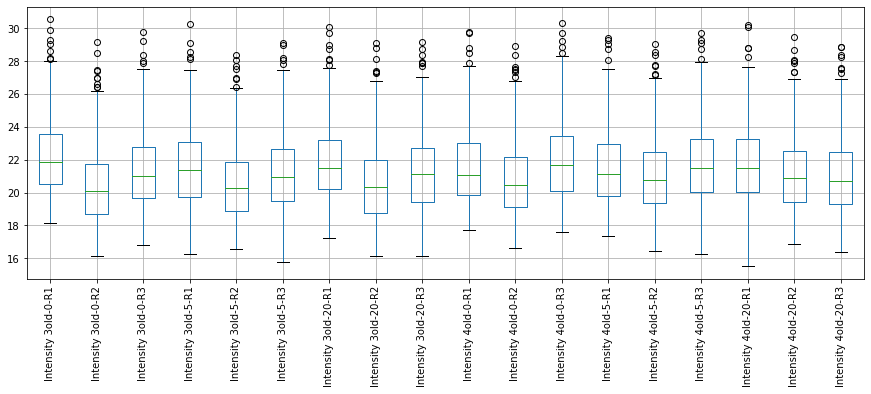

In [7]:
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (15,5)
f = plt.Figure()
df[df.columns[2:]].boxplot(rot=90)
f.set_tight_layout(True)
plt.close(f)

# Median normalization

In [8]:
global_median = df[df.columns[2:]].stack().median()
col_median = df[df.columns[2:]].median()

In [9]:
for col in df.columns[2:]:
    df[col] = df[col] + (global_median - col_median[col])

In [10]:
df.to_csv(output_folder+"/02_IntermediaryFiles/" + file_name + "_Normed_Log.tsv", sep='\t', index = False)
df

,Entry,Gene_Name,Intensity 3old-0-R1,Intensity 3old-0-R2,Intensity 3old-0-R3,Intensity 3old-5-R1,Intensity 3old-5-R2,Intensity 3old-5-R3,Intensity 3old-20-R1,Intensity 3old-20-R2,Intensity 3old-20-R3,Intensity 4old-0-R1,Intensity 4old-0-R2,Intensity 4old-0-R3,Intensity 4old-5-R1,Intensity 4old-5-R2,Intensity 4old-5-R3,Intensity 4old-20-R1,Intensity 4old-20-R2,Intensity 4old-20-R3
0,optoSrc,NaN,24.706110,25.293184,24.629151,26.735326,27.088419,26.964644,27.592235,28.061297,27.626163,24.498375,24.468258,24.548862,26.378152,26.178693,26.235134,26.922179,26.902142,27.199589
1,J9NTR3,OSBPL8,22.128772,21.406842,19.517586,21.583816,21.506670,18.767642,21.440994,21.339592,21.501909,21.107321,20.536011,21.481048,21.520661,20.171930,21.516170,21.070755,20.836485,19.784749
2,J9PAE7,TJP1,27.769490,27.903693,27.505840,27.753781,27.736110,27.554148,27.660077,28.017884,27.820695,27.858035,28.048979,27.625971,27.940401,27.958416,27.652565,27.754764,28.016752,27.942297
3,O97758,TJP1,22.357975,22.943589,22.873448,22.689495,22.712650,22.740919,22.818217,22.974007,23.115494,22.682159,22.964482,23.041776,22.844433,23.004314,22.103677,22.748033,22.926172,22.971878
4,F1PEE3,TJP2,27.016613,27.070342,26.965458,26.921268,26.992556,27.114958,27.105516,27.197784,26.917788,27.383474,27.248909,27.059886,27.205541,27.262696,26.900492,27.054165,27.081093,27.026122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,E2RHG3,GEMIN7,18.627985,NaN,16.831226,18.731311,18.731615,16.246744,19.156898,18.687153,NaN,18.400146,18.335301,NaN,19.044880,NaN,19.597518,19.033147,18.328456,18.920532
524,F1PLA1,LTBP1,NaN,18.850719,NaN,17.525401,18.300524,NaN,NaN,16.869744,19.462800,NaN,NaN,NaN,NaN,NaN,19.126734,17.955545,18.693957,19.911293
525,E2R0A6,RPL28,NaN,NaN,NaN,NaN,18.634641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.907768,18.518328,19.435893
526,F1Q448,SCAF4,NaN,18.761290,NaN,NaN,18.247641,NaN,NaN,18.287937,18.099482,18.209835,NaN,NaN,NaN,NaN,19.397773,18.393503,18.625279,19.119015


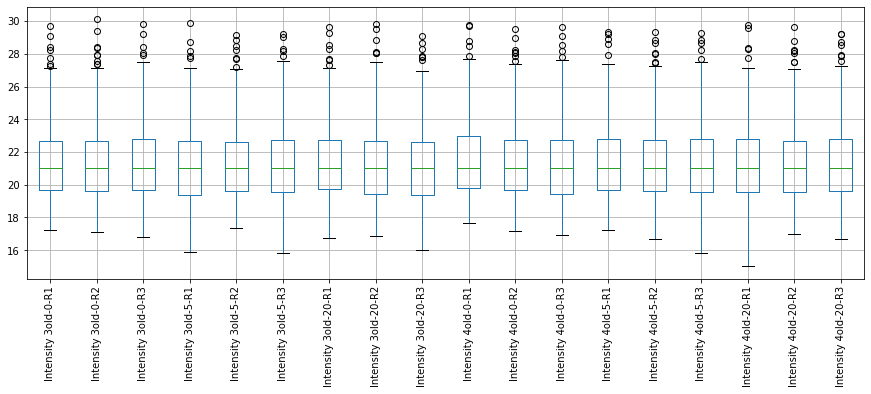

In [11]:
matplotlib.rcParams["figure.figsize"] = (15,5)
f = plt.Figure()
df[df.columns[2:]].boxplot(rot=90)
f.set_tight_layout(True)
plt.close(f)

In [12]:
matplotlib.rcParams["figure.figsize"] = (5,5)

In [13]:
no_missing_values = df.loc[np.invert(pd.isna(df[df.columns[2:]]).any(axis=1)),]
no_missing_values.to_csv(output_folder+"/02_IntermediaryFiles/"+file_name+"_Normed_Log_NoMissVal.tsv", sep='\t', index = False)
no_missing_values

,Entry,Gene_Name,Intensity 3old-0-R1,Intensity 3old-0-R2,Intensity 3old-0-R3,Intensity 3old-5-R1,Intensity 3old-5-R2,Intensity 3old-5-R3,Intensity 3old-20-R1,Intensity 3old-20-R2,Intensity 3old-20-R3,Intensity 4old-0-R1,Intensity 4old-0-R2,Intensity 4old-0-R3,Intensity 4old-5-R1,Intensity 4old-5-R2,Intensity 4old-5-R3,Intensity 4old-20-R1,Intensity 4old-20-R2,Intensity 4old-20-R3
0,optoSrc,NaN,24.706110,25.293184,24.629151,26.735326,27.088419,26.964644,27.592235,28.061297,27.626163,24.498375,24.468258,24.548862,26.378152,26.178693,26.235134,26.922179,26.902142,27.199589
1,J9NTR3,OSBPL8,22.128772,21.406842,19.517586,21.583816,21.506670,18.767642,21.440994,21.339592,21.501909,21.107321,20.536011,21.481048,21.520661,20.171930,21.516170,21.070755,20.836485,19.784749
2,J9PAE7,TJP1,27.769490,27.903693,27.505840,27.753781,27.736110,27.554148,27.660077,28.017884,27.820695,27.858035,28.048979,27.625971,27.940401,27.958416,27.652565,27.754764,28.016752,27.942297
3,O97758,TJP1,22.357975,22.943589,22.873448,22.689495,22.712650,22.740919,22.818217,22.974007,23.115494,22.682159,22.964482,23.041776,22.844433,23.004314,22.103677,22.748033,22.926172,22.971878
4,F1PEE3,TJP2,27.016613,27.070342,26.965458,26.921268,26.992556,27.114958,27.105516,27.197784,26.917788,27.383474,27.248909,27.059886,27.205541,27.262696,26.900492,27.054165,27.081093,27.026122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,F2Z4P4,EEF1A1,22.487564,23.108876,21.936416,22.430118,22.605632,22.132498,24.396463,23.401664,21.574585,21.013738,22.226788,21.192765,22.919756,22.018509,22.047706,22.011880,24.064176,21.996460
511,F1PE53,ROCK2,20.612207,20.032742,19.819648,19.803263,18.726333,20.596468,20.329782,18.776491,21.444906,18.455753,20.851595,20.967555,20.393387,20.284162,21.094013,20.190031,21.315744,20.216366
513,F6Y8P9,IMMT,18.082593,17.620527,17.961782,16.001111,17.689667,17.630173,17.653859,17.750527,17.263679,18.499004,17.813074,18.153458,18.331915,17.941446,18.642930,17.777765,17.339495,18.574838
515,O18840,ACTB,25.762562,26.159646,26.014381,25.952465,26.005218,26.632533,25.390435,26.251528,26.725940,25.875200,25.864645,26.146205,26.354687,26.084885,26.320137,25.776819,25.645347,26.923367


In [14]:
df = no_missing_values

# Separating the two experiments

In [15]:
X_CIBN = df[df.columns[2:11]].T
c_CIBN_REP = np.concatenate([[sns.color_palette("Reds")[1+2*i] for i in range(3)] for _ in range(3)])
c_CIBN_TIME = np.concatenate([[sns.color_palette("Blues")[1+2*i] for _ in range(3)] for i in range(3)])

In [16]:
X_OS = df[df.columns[11:20]].T
c_OS_REP = np.concatenate([[sns.color_palette("Purples")[1+2*i] for i in range(3)] for _ in range(3)])
c_OS_TIME = np.concatenate([[sns.color_palette("Greens")[1+2*i] for _ in range(3)] for i in range(3)])

In [17]:
X_WHOLE = pd.concat([X_CIBN,X_OS])
c_WHOLE_REP = np.concatenate([c_CIBN_REP,c_OS_REP])
c_WHOLE_TIME = np.concatenate([c_CIBN_TIME,c_OS_TIME])

# Whole dataset PCA

In [18]:
pca = PCA()
pca.fit(X_WHOLE)
X_WHOLE_PCA = pca.transform(X_WHOLE)

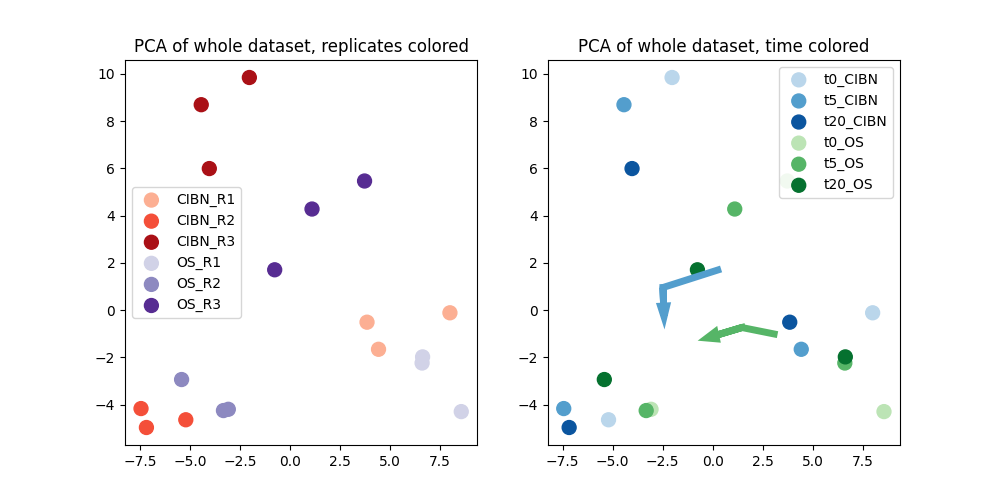

In [19]:
matplotlib.rcParams["figure.figsize"] = (10,5)
f = plt.figure()

ax1 = f.add_subplot(1,2,1)
ax2 = f.add_subplot(1,2,2)

ax1.set_title('PCA of whole dataset, replicates colored')
labels = [N1+"_R1",N1+"_R2",N1+"_R3",N2+"_R1",N2+"_R2",N2+"_R3"]
for i in range(2):
    for j in range(3):
        TMP = X_WHOLE_PCA[[9*i + 3*k + j for k in range(3)]]
        c_TMP = c_WHOLE_REP[[9*i + 3*k + j for k in range(3)]]
        ax1.scatter([x[0] for x in TMP], [x[1] for x in TMP], c=c_TMP,label=labels[3*i+j])
ax1.legend()

time_means = []
for i in range(6):
        time_means.append(np.mean(X_WHOLE_PCA[3*i:3*(i+1)],axis=0)[:2])
time_means

ax2.set_title('PCA of whole dataset, time colored')
labels = ["t0_"+N1,"t5_"+N1,"t20_"+N1,"t0_"+N2,"t5_"+N2,"t20_"+N2]
for i in range(6):
    ax2.scatter([x[0] for x in X_WHOLE_PCA[3*i:3*(i+1)]], [x[1] for x in X_WHOLE_PCA[3*i:3*(i+1)]], c=c_WHOLE_TIME[3*i:3*(i+1)], label=labels[i])
ax2.plot([t[0] for t in time_means[:3]],[t[1] for t in time_means[:3]], lw = 5, c = sns.color_palette("Blues")[3])
ax2.plot([t[0] for t in time_means[3:]],[t[1] for t in time_means[3:]], lw = 5, c = sns.color_palette("Greens")[3])
ax2.arrow(time_means[1][0],time_means[1][1],time_means[2][0] - time_means[1][0],time_means[2][1] - time_means[1][1], lw = 5,head_width=0.3,color = sns.color_palette("Blues")[3])
ax2.arrow(time_means[4][0],time_means[4][1],time_means[5][0] - time_means[4][0],time_means[5][1] - time_means[4][1], lw = 5,head_width=0.3,color = sns.color_palette("Greens")[3])
ax2.legend()
plt.show()

# Looking at the explained variance of the PCs

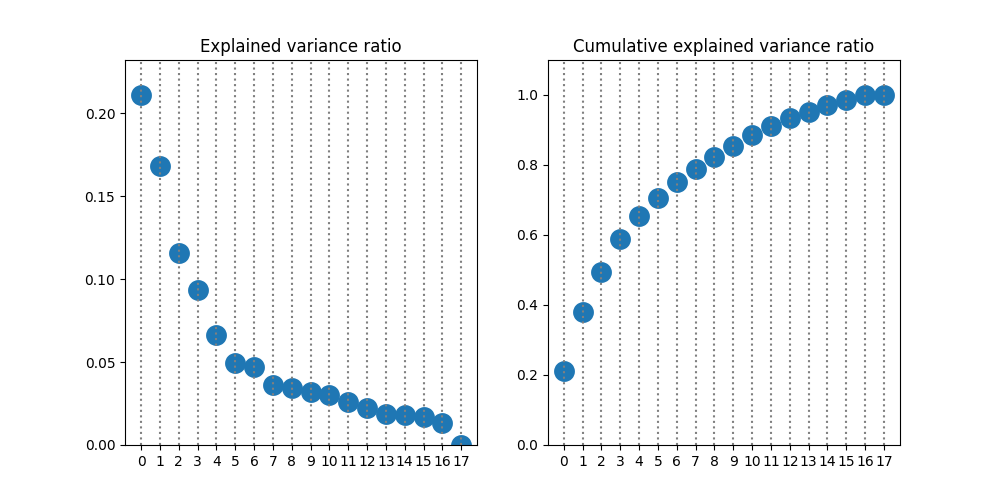

In [20]:
matplotlib.rcParams['lines.markersize'] = 10

f = plt.figure()
ax1 = f.add_subplot(1,2,1)
ax2 = f.add_subplot(1,2,2)
ax1.set_title("Explained variance ratio")
ax2.set_title("Cumulative explained variance ratio")
for i in range(18):
    ax1.plot([i,i],[0,1],":",c="grey")
ax1.scatter([str(i) for i in range(18)],pca.explained_variance_ratio_,lw=5)
ax1.set_ylim(0,pca.explained_variance_ratio_[0]*1.1)

for i in range(18):
    ax2.plot([i,i],[0,1.1],":",c="grey")
ax2.scatter([str(i) for i in range(18)],np.cumsum(pca.explained_variance_ratio_),lw=5)
ax2.set_ylim(0,1.1)
plt.show()

# Viewing specific protein

# Looking at proteins with highest loadings in the PCs

In [21]:
def show_prot_one_condition(ax,i,df,c):
    tmp = df.loc[i,]
    diff = [-0.1,0,0.1]
    for time in range(3):
        x = [time+diff[batch] for batch in range(3)]
        y = [tmp[3*time + batch] for batch in range(3)]
        ax.scatter(x,y,c = c)

def show_prot(i,X_CIBN=X_CIBN,X_OS=X_OS):
    matplotlib.rcParams["figure.figsize"] = (10,5)
    f = plt.figure()
    f.suptitle(df["Gene_Name"][i])
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122,sharey=ax1)
    ax1.set_title(N1)
    ax2.set_title(N2)
    show_prot_one_condition(ax1,i,X_CIBN.T,c_CIBN_REP[:3])
    show_prot_one_condition(ax2,i,X_OS.T,c_OS_REP[:3])
    ax1.set_xticks([0,1,2])
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Intensity")
    ax2.set_xticks([0,1,2])
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Intensity")

def show_prot_1(i,X=X_CIBN,c=c_CIBN_REP[:3],gene_names=df["Gene_Name"]):
    matplotlib.rcParams["figure.figsize"] = (5,5)
    f = plt.figure()
    f.suptitle(gene_names[i])
    ax1 = plt.subplot(111)
    show_prot_one_condition(ax1,i,X.T,c)
    ax1.set_xticks([0,1,2])
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Intensity")

In [22]:
loadings_w_index = list(zip(df.index,np.sqrt(pca.components_[0]**2+pca.components_[1]**2)))
loadings_w_index_sorted = sorted(loadings_w_index, key = lambda x : x[1],reverse=True)

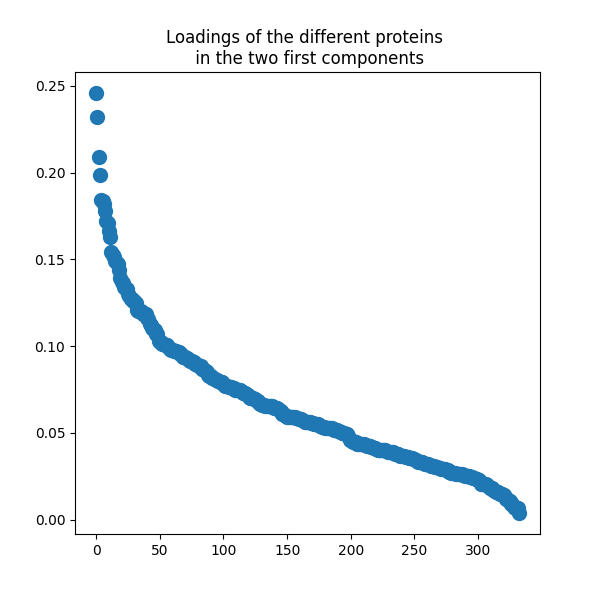

In [23]:
matplotlib.rcParams["figure.figsize"] = (6,6)
f = plt.figure()
plt.title("Loadings of the different proteins \n in the two first components")
plt.scatter(range(len(loadings_w_index_sorted)),[x[1] for x in loadings_w_index_sorted])
plt.show()

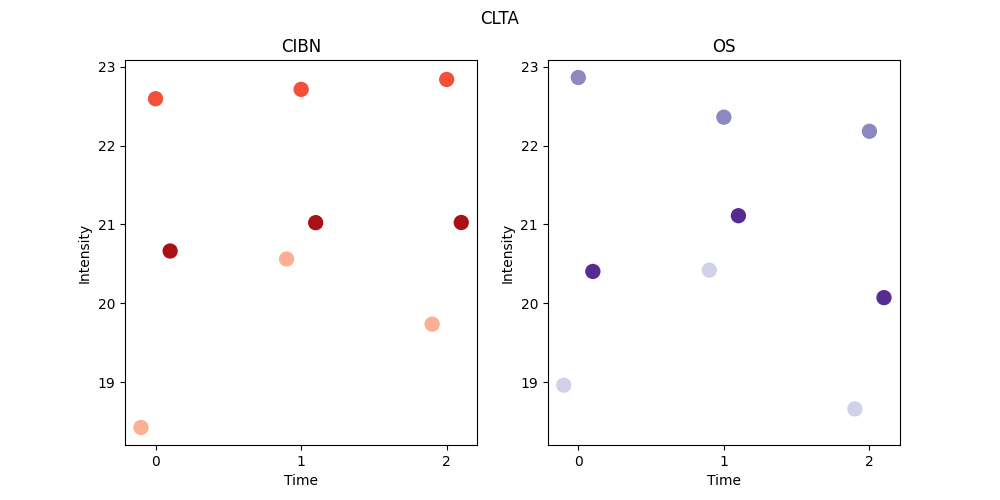

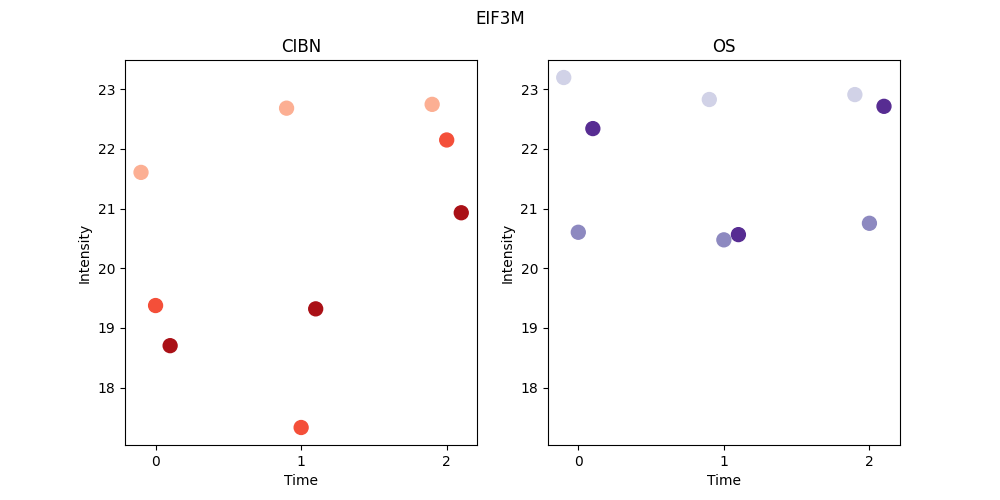

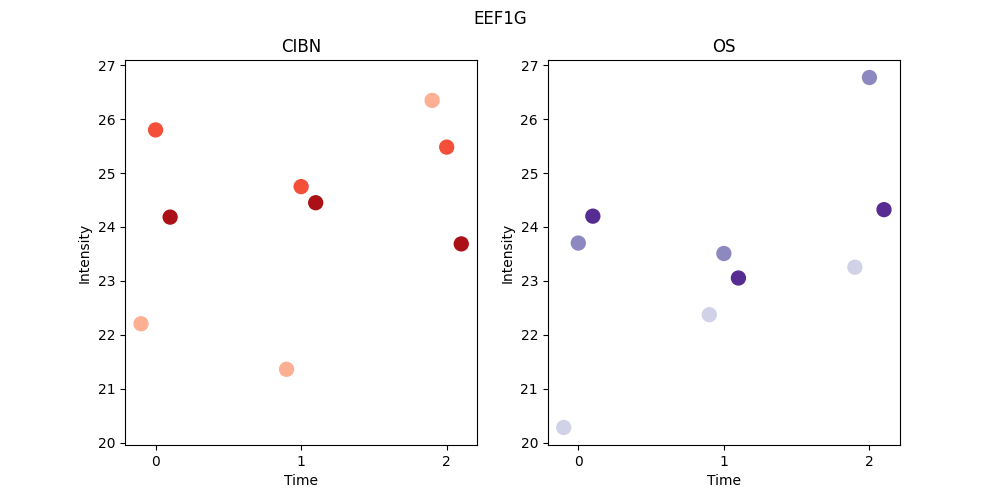

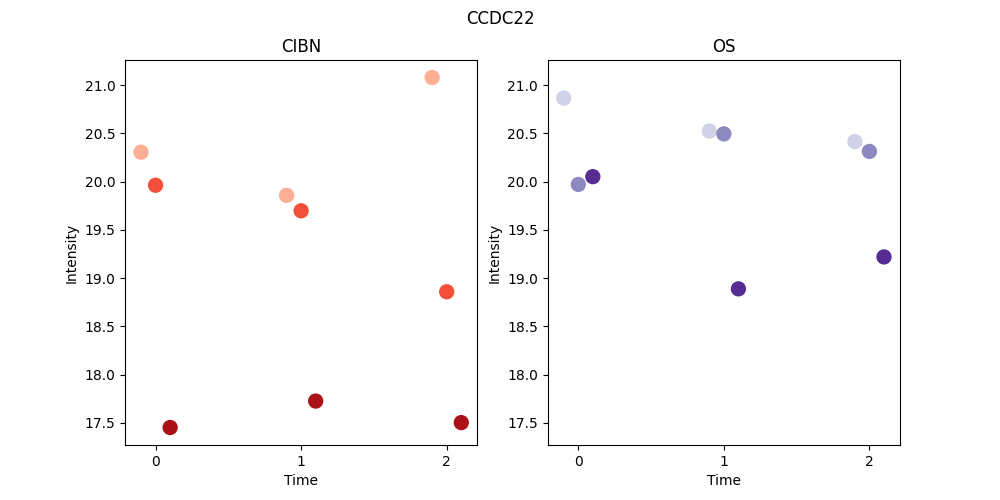

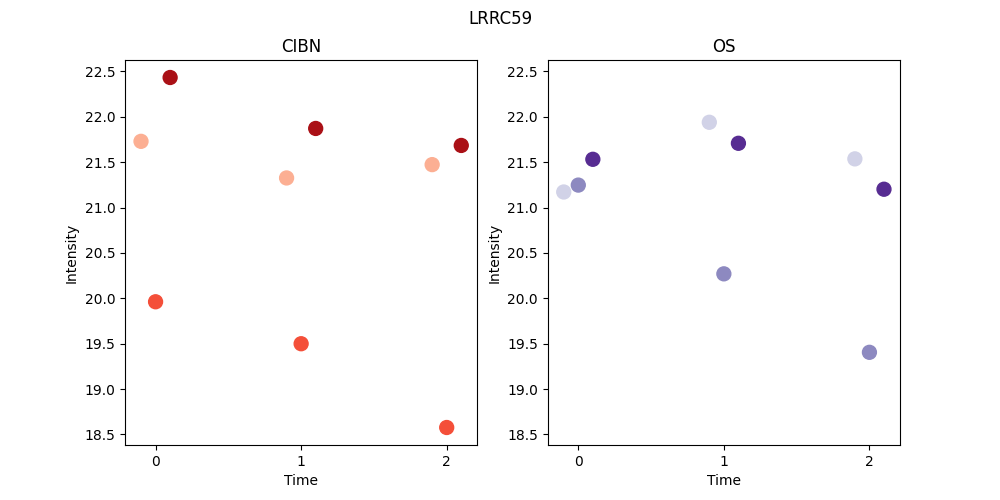

In [24]:
for el,val in loadings_w_index_sorted[:5]:
    show_prot(el)